## 1. Merge Root Files

In [ ]:
import Radiography_Library as RadLib

directory = '/Users/miguelcomett/geant4-v11.2.2_2/ESTANCIA' + '/'
directory = 'BUILD/ROOT/'

starts_with = 'CT'
output_name = 'Aang_180'

# trim_coords = None
trim_coords = (-250, 250, -270, 230)  # x_min, x_max, y_min, y_max

RadLib.MergeRoots_Parallel(directory, starts_with, output_name, trim_coords) 

### 1.2. Get ROOT Summary Data 

In [ ]:
import Radiography_Library as RadLib

directory = '/Users/miguelcomett/geant4-v11.2.2_2/ESTANCIA' + '/'
root_file = 'thorax_80_2285' + '.root'
tree_1 = 'Hits'
branch_1 = 'x_ax'
tree_2 = 'Run Summary'
branches_2 = ['Number_of_Photons', 'EDep_Value_TeV', 'Radiation_Dose_uSv']

NumberofHits, NumberofPhotons, EnergyDeposition, RadiationDose = RadLib.Summary_Data(directory, root_file, tree_1, branch_1, tree_2, branches_2)

print('Total Hits in simulation:', NumberofHits)
print('Initial photons in simulation:', NumberofPhotons)
print('Total energy deposited in tissue (TeV):', round(EnergyDeposition, 5))
print('Dose of radiation received (uSv):', round(RadiationDose, 5))

### 1.3. CT Summary

In [ ]:
import Radiography_Library as RadLib

directory = '/Users/miguelcomett/geant4-v11.2.2_2/ESTANCIA/CT/'

tree = 'Run Summary'
branches = ['Number_of_Photons', 'EDep_Value_TeV', 'Radiation_Dose_uSv']

NumberofPhotons, EnergyDeposition, RadiationDose = RadLib.CT_Summary_Data(directory, tree, branches)

print('Initial photons in simulation:', NumberofPhotons)
print('Total energy deposited in tissue (TeV):', round(EnergyDeposition, 5))
print('Dose of radiation received (uSv):', round(RadiationDose, 5))

## 2. Root File to Heatmap

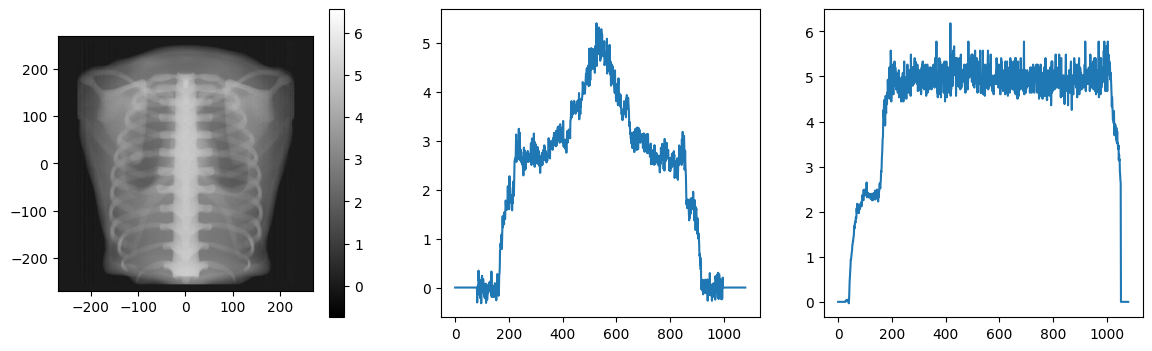

In [3]:
import Radiography_Library as RadLib

directory = '/Users/miguelcomett/GEANT4/G4_MedX/OldRoots/'
directory = '/Users/miguelcomett/GEANT4/G4_MedX/'
directory = 'BUILD/ROOT/'

root_name = "thorax_40_2285" + ".root"
root_name = 'Aang_0' + '.root'
root_name = 'CT_40' + '.root'

tree_name = "Hits"; x_branch  = "x_ax"; y_branch  = "y_ax"

size = [270, 270, 0, -0] # size_x, size_y, x_shift, y_shift, 

pixel_size = 0.5 # mm

save_as = ''

htmp_array, xlim, ylim = RadLib.Root_to_Heatmap(directory, root_name, tree_name, x_branch, y_branch, size, pixel_size)
htmp_array, xlim, ylim = RadLib.Logaritmic_Transform(htmp_array, size, pixel_size)
RadLib.Plot_Heatmap(htmp_array, xlim, ylim, save_as)

#### Show Interactive Plot

In [ ]:
import plotly.graph_objects as go; import plotly.io as pio

fig = go.Figure(go.Heatmap(z = htmp_array, x = xlim, y = ylim, colorscale = [[0, 'black'], [1, 'white']], showscale = False))
fig.update_layout(width = 800, height = 800, yaxis = dict(autorange = 'reversed'))    
fig.show()

## 3. DEXA: Tissue Segmentation

### Calculate Heatmaps

In [1]:
import Radiography_Library as RadLib; import matplotlib.pyplot as plt

directory = '/Users/miguelcomett/geant4-v11.2.2_2/ESTANCIA/'
directory = 'BUILD/ROOT/'

rootnames = ["CT_10.root", "CT_11.root"]
rootnames = ["ct_40.root", "ct_80_1.root"]

tree_name = "Hits"; x_branch  = "x_ax"; y_branch  = "y_ax"

size = [270, 270, 0, 0]

pixel_size = 0.5

low_energy_img, xlim, ylim  = RadLib.Root_to_Heatmap(directory, rootnames[0], tree_name, x_branch, y_branch, size, pixel_size)
high_energy_img, xlim, ylim = RadLib.Root_to_Heatmap(directory, rootnames[1], tree_name, x_branch, y_branch, size, pixel_size)
low_energy_img, xlim, ylim = RadLib.Logaritmic_Transform(low_energy_img, size, pixel_size)
high_energy_img, xlim, ylim = RadLib.Logaritmic_Transform(high_energy_img, size, pixel_size)

### Perform Segmentation

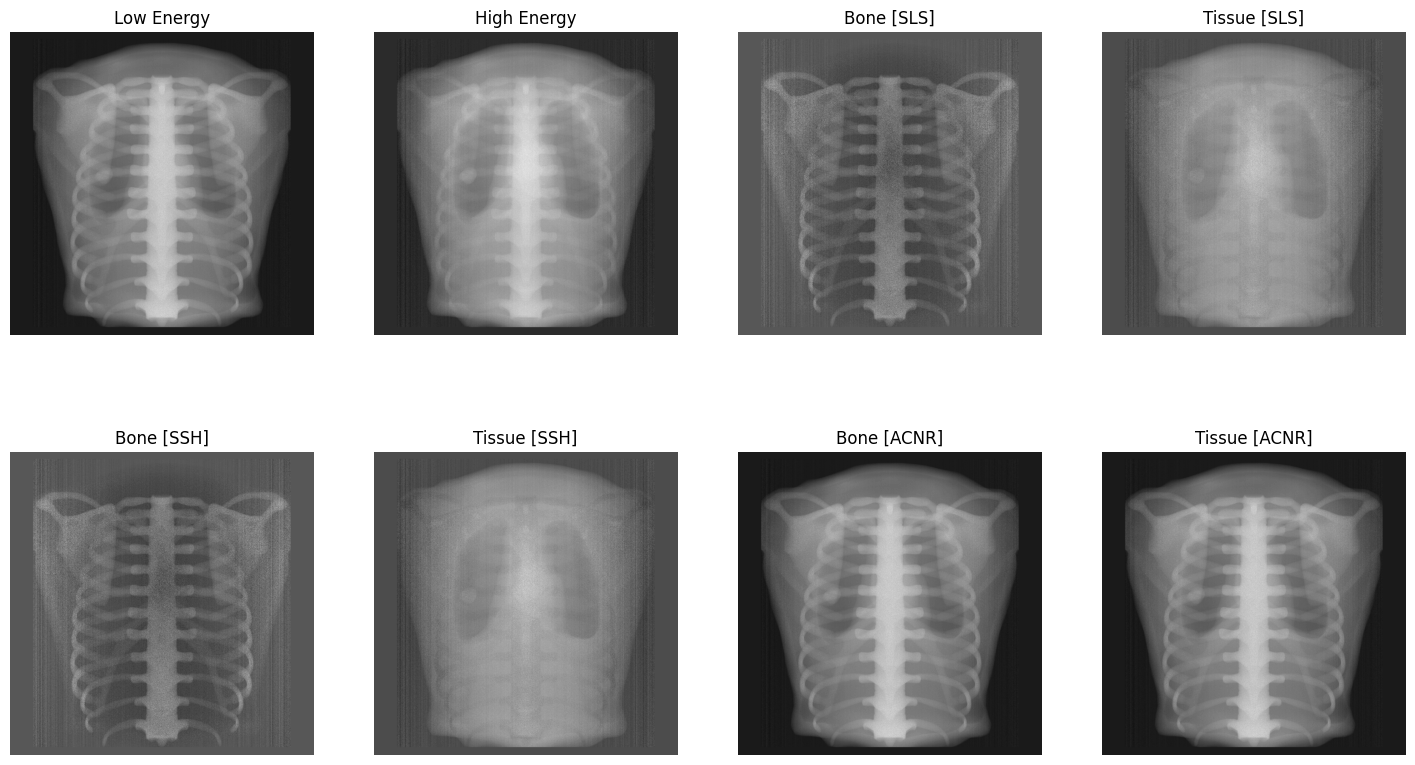

In [ ]:
sigma = 0
wn = 1

save_in = ''
save_as = ['', '', '', '', '', '', '', ''] # Low Energy, High Energy, Bone [SLS], Tissue [SLS], Bone [SSH], Tissue [SSH], Bone [ACNR], Tissue [ACNR]

SLS_Bone, SLS_Tissue, SSH_Bone, SSH_Tissue, ACNR_Bone, ACNR_Tissue = RadLib.IsolateTissues(low_energy_img, high_energy_img, sigma, sigma, wn, save_in, save_as)

## 4. Bone Mineral Density (BMD)

In [ ]:
import Radiography_Library as RadLib

save_as = ''
thickness_bone = RadLib.BMO(SLS_Bone, SLS_Tissue, save_as)

#### Plot Interactive Heatmap

In [ ]:
import plotly.graph_objects as go; import plotly.io as pio

fig = go.Figure(go.Heatmap(z = thickness_bone, x = xlim, y = ylim))
fig.update_layout(width = 400, height = 400, xaxis = dict(autorange = 'reversed'), yaxis = dict(autorange = 'reversed'))    
fig.show()

## 5.1. Calculate Interactive CNR

#### Trim Image

In [ ]:
from PIL import Image; import matplotlib.pyplot as plt

directory = 'RESULTS/'
image = 'ssh' + '.png'
image = Image.open(directory + image)
image = image.convert('L')

print(image.size)
width = image.width; height = image.height

trim = 200
# image = image.crop((trim, trim, width - trim, height - trim)) # left, top, right, bottom
# image = image.crop((8410, trim, width - 60, height - trim))

# plt.imshow(image, cmap='gray'); plt.axis('off'); plt.show()

#### Launch Interactive CNR

In [ ]:
%matplotlib widget 
%matplotlib tk
import Radiography_Library as RadLib

RadLib.Interactive_CNR(image)

## 5.2. Calculate Fixed CNR 

In [ ]:
import Radiography_Library as RadLib

image_path = "RESULTS/" + "a" + ".png"
save_as = ''

shftx_s = 0.0 # shift x-coordinate signal box
shfty_s = 0.0 
shftx_b = 200.0 # shift x-coordinate background box
shfty_b = 0.0

coords_signal  = [1200 + shftx_s, 1000 + shfty_s, 1800 + shftx_s, 1800 + shfty_s] # x1, y1, x2, y2
coords_bckgrnd = [2100 + shftx_b, 1000 + shfty_b, 2300 + shftx_b, 1800 + shfty_b] # x1, y1, x2, y2

RadLib.Fixed_CNR(image_path, save_as, coords_signal, coords_bckgrnd)

## 6.1. Denoise with Skimage.Denoise_Bilateral

In [ ]:
import Radiography_Library as RadLib

# load array
path = SSH_Bone
isArray = True

# or load image
if isArray == False:
    directory = 'RESULTS/'
    path = directory + 'a' + '.png'

sigma_color = 0.05
sigma_spatial = 20

Denoised_Image = RadLib.Denoise_EdgeDetection(path, isArray)

## 6.2. Denoise by Fourier Transform

In [ ]:
import Radiography_Library as RadLib

array = htmp_array
isHann = False

alpha = 1

save_as = ''
isCrossSection = False # plot crosss-section

fft_image = RadLib.Denoise(array, isHann, alpha, save_as, isCrossSection)

## 7. Save Plotly Heatmap

In [ ]:
import Radiography_Library as RadLib

# array = htmp_array
# array = Denoised_Image
array = ACNR_Bone
array = low_energy_img

title   = r"$ \large{ \text{Thorax Radiography Projection(40 keV)} } $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

width  = 800
height = 800

save_as = ''

RadLib.Plotly_Heatmap_1(array, xlim, ylim, title, x_label, y_label, width, height, save_as)

### Plot with annotation and rectanngles

In [ ]:
import Radiography_Library as RadLib

array = htmp_array

title   = r"$ \large{ \text{Low energy projection (40 keV), 100M Photons} } $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

sqr_1_coords = [10, 10, -10, -10]
sqr_2_coords = [10, 10, -10, -10]

annotation = 'CNR = ' 

width  = 700
height = 700

save_as = ''

Radlib.Plotly_Heatmap_2(array, xlim, ylim, title, x_label, y_label, sqr_1_coords, sqr_2_coords, annotation, width, height, save_as)

# 8. CT Scan

## 8.1 Run CT loop

In [ ]:
import Radiography_Library as RadLib; import platform

if platform.system() == "Darwin": directory = 'BUILD/'
if platform.system() == "Windows": directory = 'build\\Release\\'

starts_with = 'CT'

angles = [277, 360]

RadLib.CT_Loop(directory, starts_with, angles)

## 8.2 Calculate projections at every angle from roots and save to CSV

In [ ]:
import Radiography_Library as RadLib; import matplotlib.pyplot as plt; import numpy as np

directory = '/Users/miguelcomett/geant4-v11.2.2_2/G4_MedX/CT_Raw' + '/'
filename = 'Aang'

roots = [0, 359, 1] # start, end, degree step

tree_name = "Hits"
x_branch  = "x_ax"
y_branch  = "y_ax"

dimensions = [270, 270, 0, 0] # sizeX, sizeY, shiftX, shiftY, # in mm

pixel_size = 0.5 # in mm

csv_folder = '/Users/miguelcomett/geant4-v11.2.2_2/G4_MedX/CT_CSV'

htmp, xlim, ylim = RadLib.Calculate_Projections(directory, filename, roots, tree_name, x_branch, y_branch, dimensions, pixel_size, csv_folder)

print("Max value:", np.max(htmp))
print("99th percentile:", np.percentile(htmp, 99))

lower = np.percentile(htmp, 0)
upper = np.percentile(htmp, 99)
clipped_htmp = np.clip(htmp, lower, upper)
plt.imshow(clipped_htmp, cmap='gray'); plt.colorbar(); plt.show()

# RadLib.Plot_Heatmap(htmp, xlim, ylim, save_as='')

## 8.3 Load projections from CSV and perfrom CT reconstruction

In [ ]:
import Radiography_Library as RadLib; import numpy as np; from scipy import ndimage; from tqdm import tqdm

roots = [0, 359, 1] # start, end, degree step
csv_folder = '/Users/miguelcomett/geant4-v11.2.2_2/G4_MedX/CT_CSV' + '/'
radiographs = RadLib.LoadHeatmapsFromCSV(csv_folder, roots)

In [ ]:
dimensions = [260, 260, 0, 0] # sizeX, sizeY, shiftX, shiftY, # in mm
pixel_size = 0.7
sigma = 3
htmps = np.zeros(len(radiographs), dtype = 'object')
for i, radiograph in tqdm(enumerate(radiographs), desc = 'Computing logarithmic transformation', unit = ' Heatmaps', leave = True):
    radiograph = ndimage.gaussian_filter(radiograph, sigma)
    htmp_array, xlim, ylim = RadLib.Logaritmic_Transform(radiograph, dimensions, pixel_size)
    htmps[i] = htmp_array

In [ ]:
slices = [-280, 245, 4] # initial, final, step
slices = [-280, -276, 4] # initial, final, step

reconstruction = RadLib.RadonReconstruction(roots, htmps, slices)

mu_water = 0.26748 # 40kev
mu_water = 0.18443 # 80kev
air_tolerance = -800
# HU_images = RadLib.CoefficientstoHU(reconstruction, slices, mu_water, air_tolerance)

## 8.4 Export to DICOM

In [ ]:
directory = '/Users/miguelcomett/geant4-v11.2.2_2/G4_MedX/OldRoots/CT_DICOM'

dimensions = [250, 75, 0, 150]
size_y = dimensions[1]

compressed = False

RadLib.export_to_dicom(HU_images, size_y, directory, compressed)